# **Import the needed Libraries and Modules**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("/content/Super_Store_data.csv", encoding='latin1')

# **1- Data Preprocessing:-**

In [ ]:
df_clean = df.copy()

In [ ]:
columns_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Product Name']
df_clean.drop(columns=columns_to_drop, inplace=True)

df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])
df_clean['Ship Date'] = pd.to_datetime(df_clean['Ship Date'])


In [ ]:
df_clean['Order Year'] = df_clean['Order Date'].dt.year
df_clean['Order Month'] = df_clean['Order Date'].dt.month

df_clean['Shipping Days'] = (df_clean['Ship Date'] - df_clean['Order Date']).dt.days

df_clean.drop(columns=['Order Date', 'Ship Date'], inplace=True)


In [ ]:
categorical_cols = df_clean.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [ ]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df_clean.drop_duplicates(inplace=True)

In [ ]:
print(f"Final shape: {df_clean.shape}")
print(df_clean.head())

Final shape: (2120, 16)
   Ship Mode  Segment  Country  City  State  Postal Code  Region  Category  \
0          2        0        0   137     15        42420       2         0   
1          2        0        0   137     15        42420       2         0   
2          3        0        0   108      8        33311       2         0   
3          3        0        0   184      3        90032       3         0   
4          3        0        0   184      3        90032       3         0   

   Sub-Category      Sales  Quantity  Discount    Profit  Order Year  \
0             0   261.9600         2      0.00   41.9136        2016   
1             1   731.9400         3      0.00  219.5820        2016   
2             3   957.5775         5      0.45 -383.0310        2015   
3             2    48.8600         7      0.00   14.1694        2014   
4             3  1706.1840         9      0.20   85.3092        2014   

   Order Month  Shipping Days  
0           11              3  
1         

# **2- EDA Tchniques:-**

**1- Distribution of Sales**

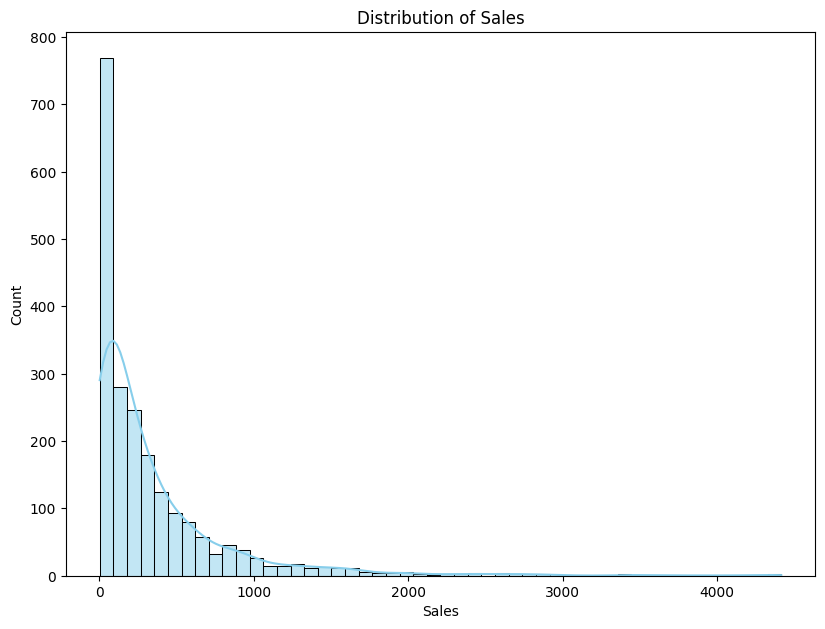

In [ ]:
# 1. Distribution of Sales
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 1)
sns.histplot(df_clean['Sales'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.tight_layout()
plt.show()

**2-  Distribution of Profit**

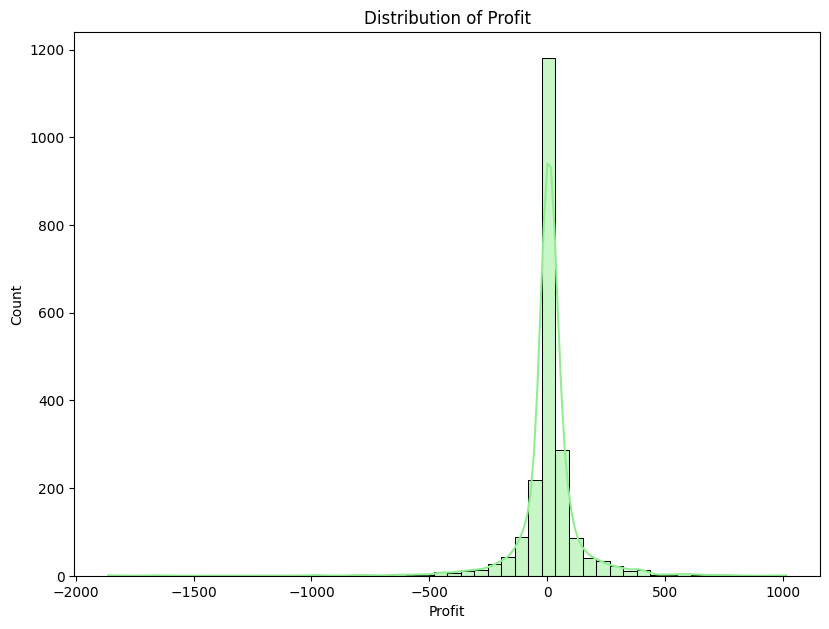

In [ ]:
# 2. Distribution of Profit
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 2)
sns.histplot(df_clean['Profit'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Profit')
plt.tight_layout()
plt.show()

**3- Profit by Category**

<ipython-input-13-ce912569ddc9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Profit', data=df, palette='Set2')


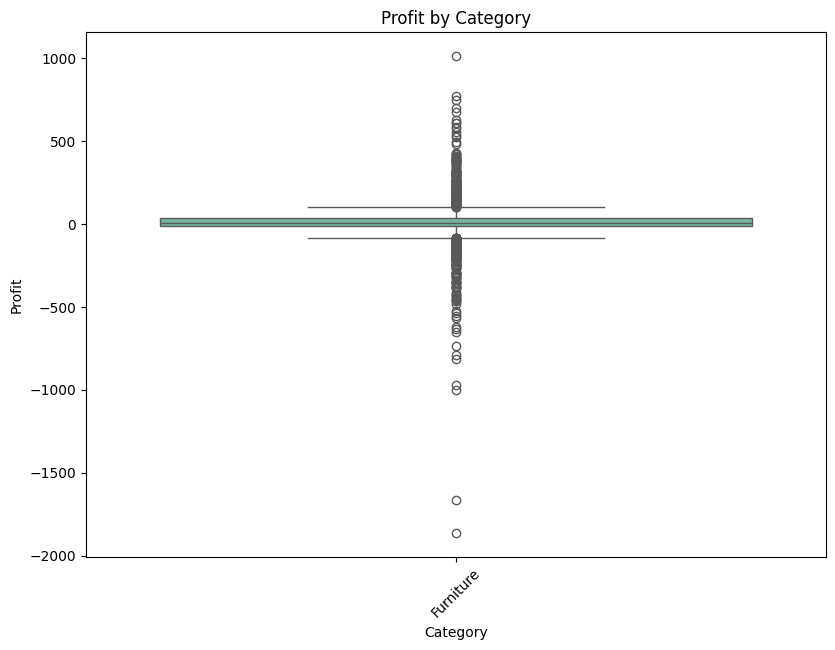

In [ ]:
# 3. Profit by Category
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 3)
sns.boxplot(x='Category', y='Profit', data=df, palette='Set2')
plt.title('Profit by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4- Correlation Heatmap**

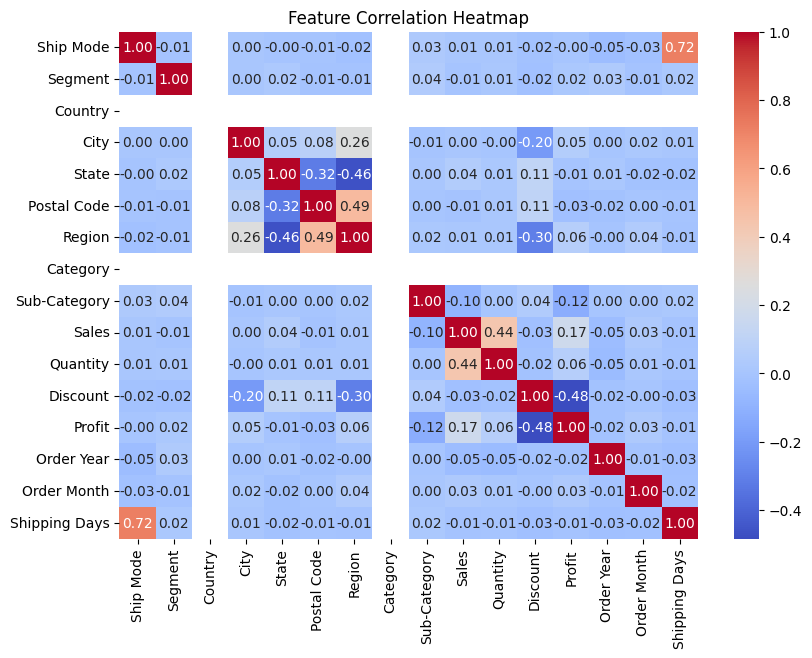

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 4)
corr = df_clean.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


**5- Sales by Order Month**

<ipython-input-15-3c2f732dc5b8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Order Month', y='Sales', data=df_clean, palette='Set3')


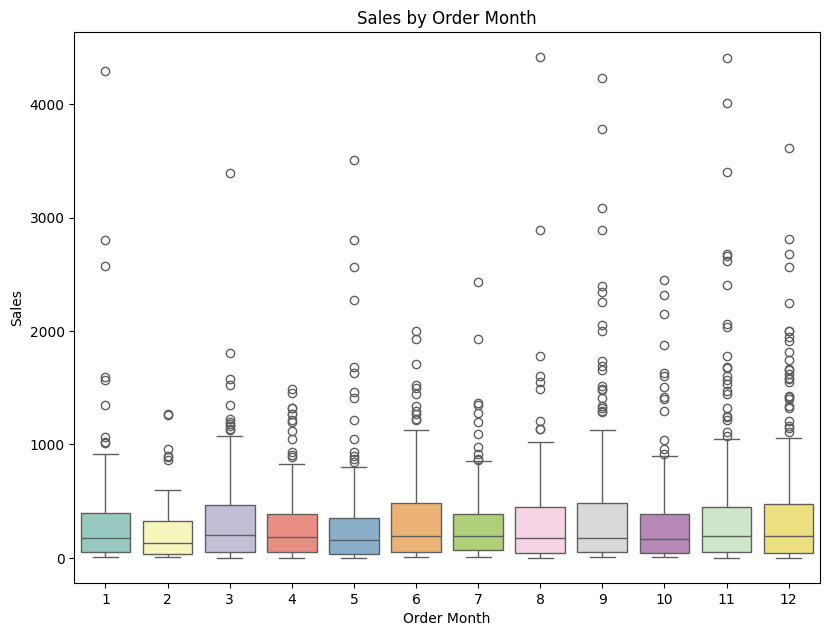

In [ ]:
# 5. Sales by Order Month
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 5)
sns.boxplot(x='Order Month', y='Sales', data=df_clean, palette='Set3')
plt.title('Sales by Order Month')
plt.tight_layout()
plt.show()


**6- Profit vs Discount**

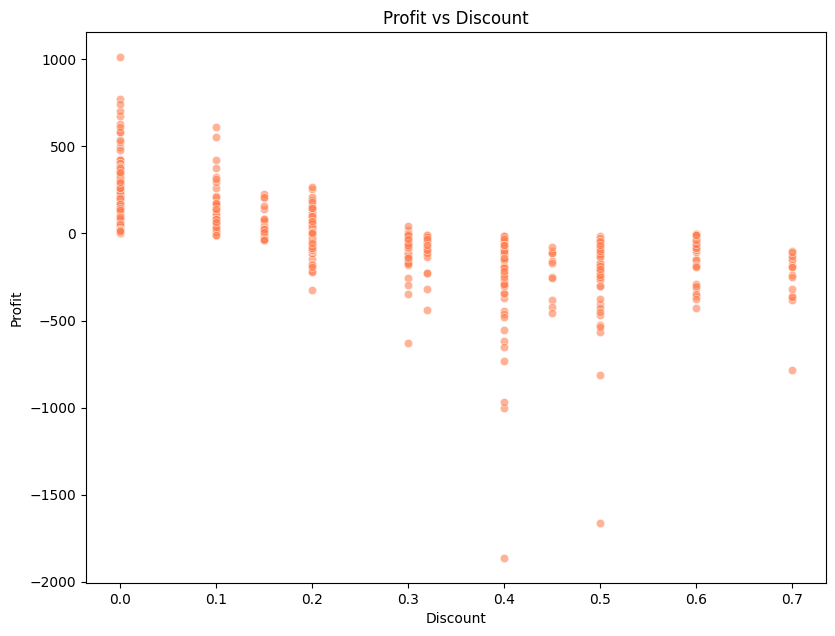

In [ ]:
# 6. Profit vs Discount Scatterplot
plt.figure(figsize=(16, 18))
plt.subplot(3, 2, 6)
sns.scatterplot(x='Discount', y='Profit', data=df_clean, alpha=0.6, color='coral')
plt.title('Profit vs Discount')
plt.tight_layout()
plt.show()

**3- Feature Selection:-**

**- Feature Selection with SelectKBest**

In [ ]:
X = df_clean.drop(columns=['Sales'])
y = df_clean['Sales']

fsf_selector = SelectKBest(score_func=f_regression, k=5)
X_new_fsf = fsf_selector.fit_transform(X, y)

selected_fsf_features = X.columns[fsf_selector.get_support()]
print("Top 5 Features Selected using SelectKBest:", selected_fsf_features.tolist())


Top 5 Features Selected using SelectKBest: ['State', 'Sub-Category', 'Quantity', 'Profit', 'Order Year']


**- Top 5 Features Selected Based on F-Scores**

<ipython-input-18-efc138567fe1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-Score', y='Feature', data=top_features, palette='viridis')


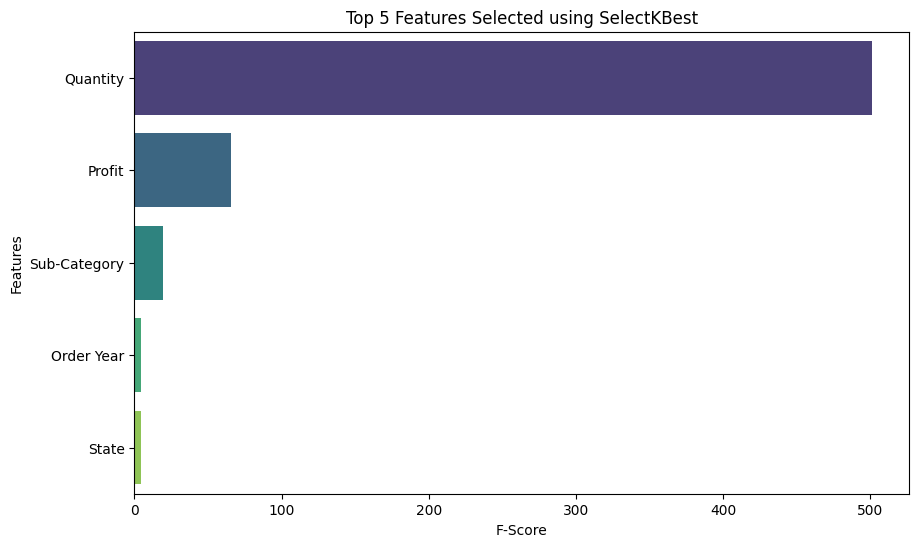

In [ ]:
f_scores, p_values = f_regression(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores})
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

top_features = feature_scores.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='F-Score', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Features Selected using SelectKBest')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.show()

**- Top 5 Features Selected Using Recursive Feature Elimination (RFE)**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rfe_selector = RFE(rf_model, n_features_to_select=5)
rfe_selector.fit(X, y)

selected_rfe_features = X.columns[rfe_selector.support_]
print("Top 5 Features Selected using RFE:", selected_rfe_features.tolist())


Top 5 Features Selected using RFE: ['Postal Code', 'Sub-Category', 'Quantity', 'Discount', 'Profit']


**- Feature Rankings Using Recursive Feature Elimination (RFE) with Random Forest**

<ipython-input-20-2706bcaf09c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=rfe_ranking, palette='coolwarm')


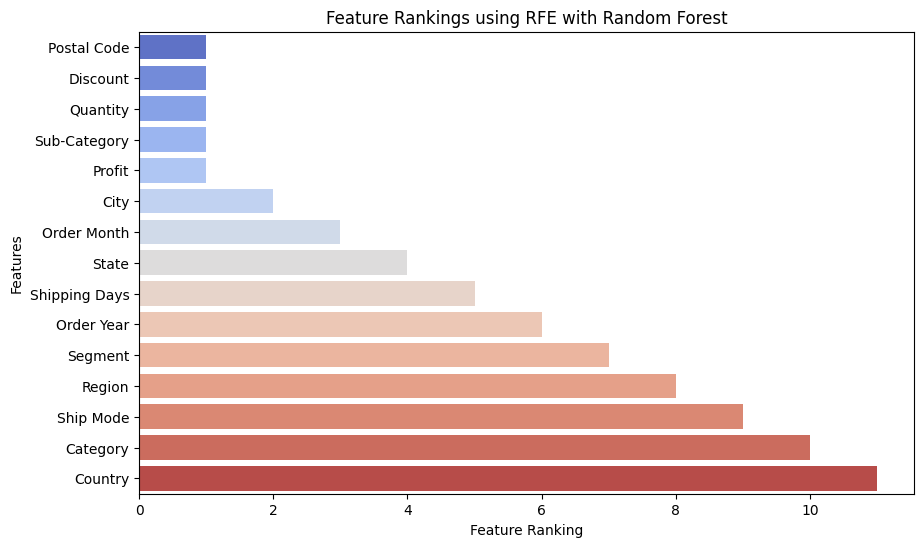

In [ ]:
rfe_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe_selector.ranking_})

rfe_ranking = rfe_ranking.sort_values(by='Ranking')

plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=rfe_ranking, palette='coolwarm')
plt.title('Feature Rankings using RFE with Random Forest')
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.show()

**- Variance Inflation Factor (VIF) Calculation**

In [ ]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["features"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_data = calculate_vif(X)
print("VIF for each feature:")
print(vif_data)

high_vif_features = vif_data[vif_data["VIF"] > 5]
print("Features with high VIF (> 5):", high_vif_features)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


VIF for each feature:
         features        VIF
0       Ship Mode  10.560708
1         Segment   1.739204
2         Country        NaN
3            City   5.630973
4           State   4.055970
5     Postal Code   5.939217
6          Region   5.564926
7        Category        NaN
8    Sub-Category   4.722603
9        Quantity   3.848332
10       Discount   3.152103
11         Profit   1.367435
12     Order Year  32.348659
13    Order Month   6.772445
14  Shipping Days  12.432940
Features with high VIF (> 5):          features        VIF
0       Ship Mode  10.560708
3            City   5.630973
5     Postal Code   5.939217
6          Region   5.564926
12     Order Year  32.348659
13    Order Month   6.772445
14  Shipping Days  12.432940


<ipython-input-22-38a4055ff091>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='features', data=vif_data, palette='viridis')


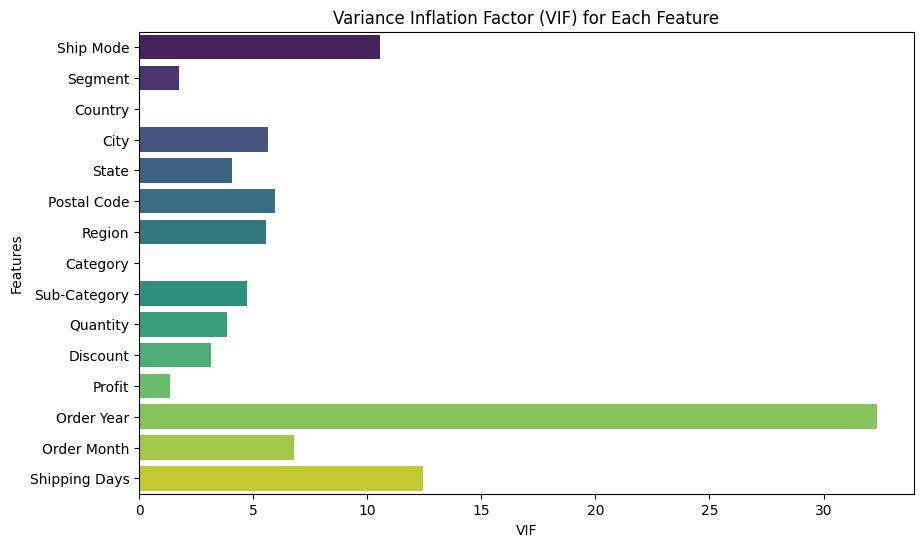

Features with high VIF (> 5):
         features        VIF
0       Ship Mode  10.560708
3            City   5.630973
5     Postal Code   5.939217
6          Region   5.564926
12     Order Year  32.348659
13    Order Month   6.772445
14  Shipping Days  12.432940


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='features', data=vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Each Feature')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.show()

print("Features with high VIF (> 5):")
print(high_vif_features)

**4- Feature engineering:-**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**- Feature Engineering for Predictive Modeling**

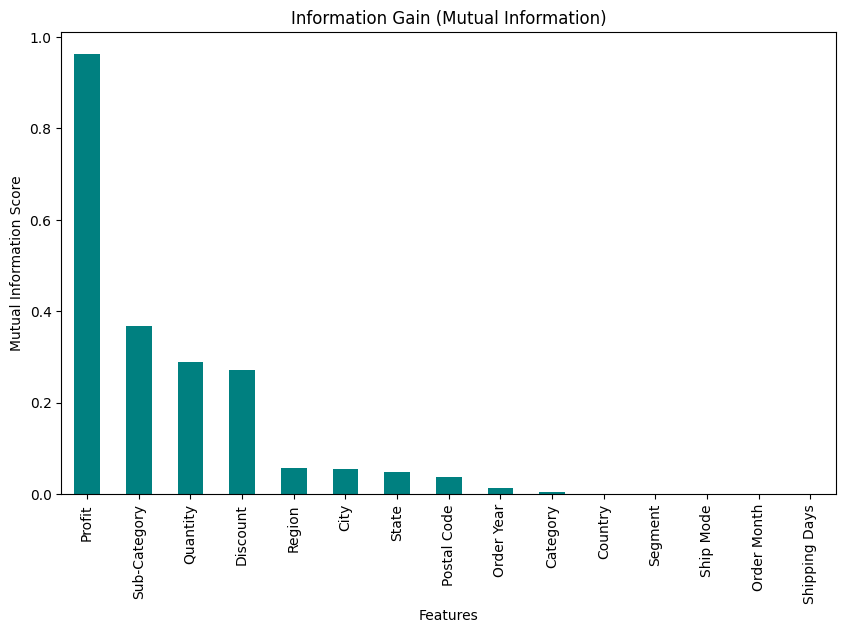

In [ ]:
mi_scores = mutual_info_regression(X_scaled, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
mi_scores.plot(kind="bar", color="teal")
plt.title("Information Gain (Mutual Information)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

**- Transforming Data for Better Modeling**

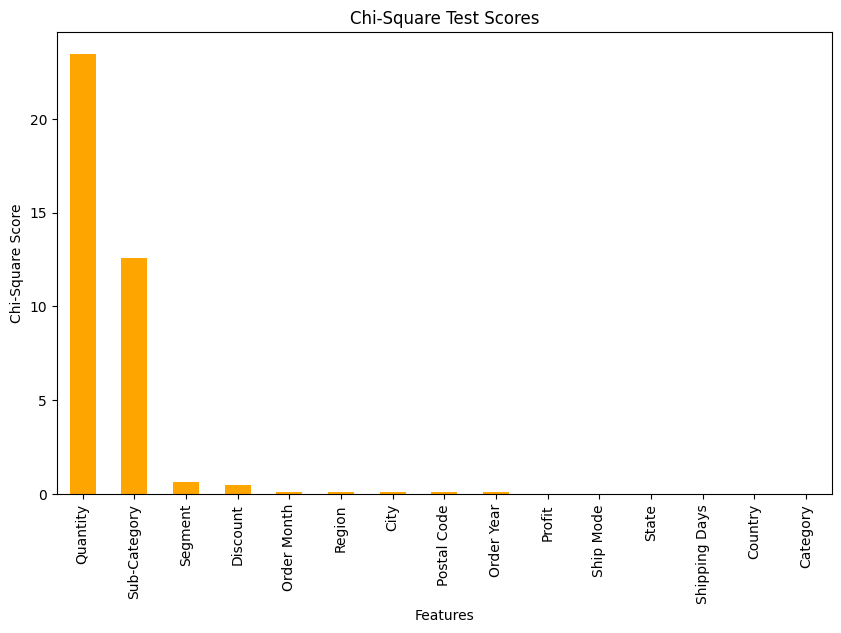

In [ ]:
y_bin = (y > y.median()).astype(int)

minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(X)

chi2_scores, _ = chi2(X_non_negative, y_bin)
chi2_scores = pd.Series(chi2_scores, index=X.columns)
chi2_scores.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
chi2_scores.plot(kind="bar", color="orange")
plt.title("Chi-Square Test Scores")
plt.xlabel("Features")
plt.ylabel("Chi-Square Score")
plt.show()

**- Feature Selection with Variance Threshold**

In [ ]:
variance_threshold = VarianceThreshold(threshold=0.1)
X_variance_selected = variance_threshold.fit_transform(X_scaled)

selected_features = variance_threshold.get_support(indices=True)
print("Selected Features (Variance Threshold):", X.columns[selected_features])

Selected Features (Variance Threshold): Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Sub-Category', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'Shipping Days'],
      dtype='object')


**- Feature Selection with Fisher's Score**

<ipython-input-27-05c5132857ca>:15: RuntimeWarning: invalid value encountered in divide
  fisher_scores = between_var / within_var


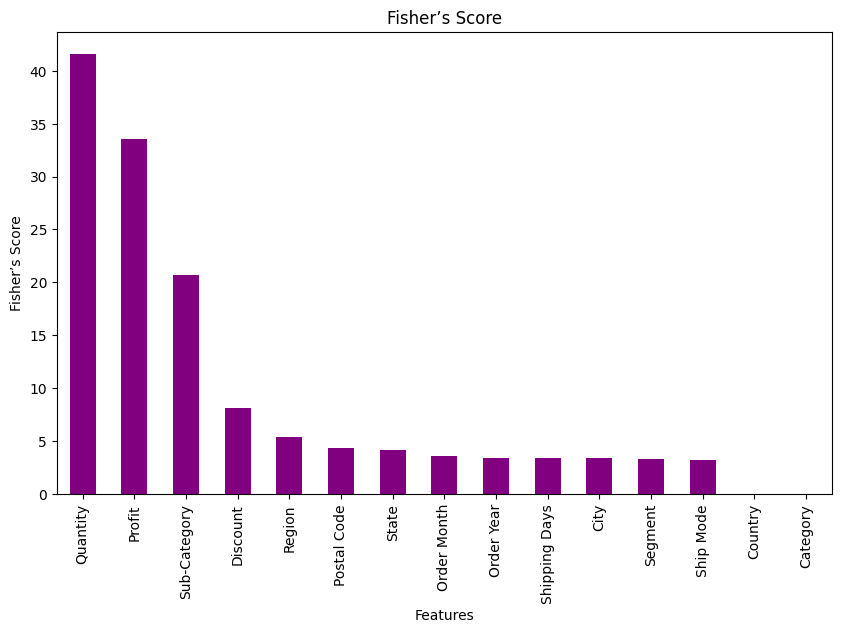

In [ ]:
def fisher_score(X, y):
    classes = np.unique(y)
    overall_mean = np.mean(X, axis=0)
    between_var = np.zeros(X.shape[1])
    within_var = np.zeros(X.shape[1])

    for c in classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        between_var += n_c * (mean_c - overall_mean) ** 2
        within_var += np.sum((X_c - mean_c) ** 2, axis=0)

    fisher_scores = between_var / within_var
    return fisher_scores

fisher_scores = fisher_score(X_scaled, y)
fisher_scores = pd.Series(fisher_scores, index=X.columns)
fisher_scores.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
fisher_scores.plot(kind="bar", color="purple")
plt.title("Fisher’s Score")
plt.xlabel("Features")
plt.ylabel("Fisher’s Score")
plt.show()


**- Correlation Coefficient with Target**

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


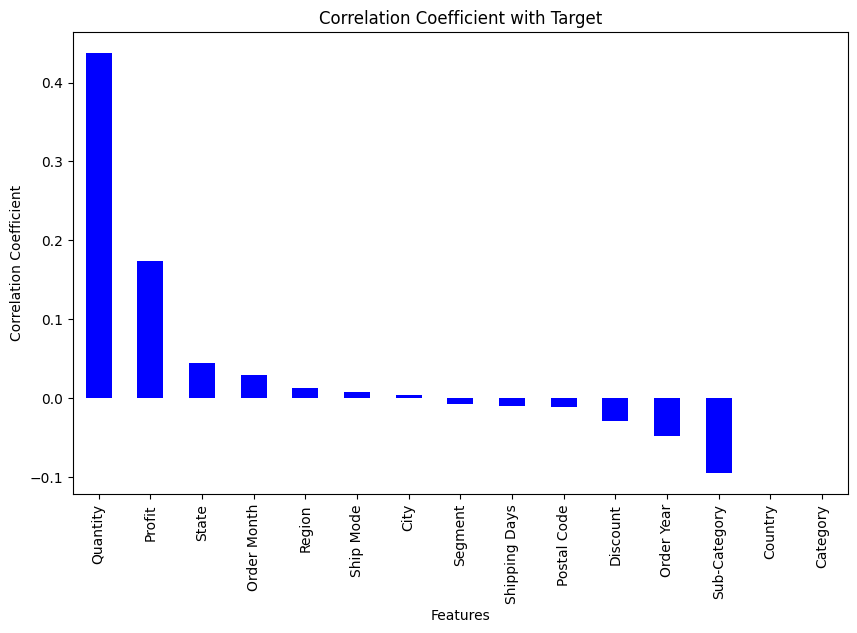

In [ ]:
corr_scores = np.corrcoef(X_scaled.T, y)[-1, :-1]
corr_scores = pd.Series(corr_scores, index=X.columns)
corr_scores.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
corr_scores.plot(kind="bar", color="blue")
plt.title("Correlation Coefficient with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [ ]:
df_clean

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Shipping Days
0,2,0,0,137,15,42420,2,0,0,261.9600,2,0.00,41.9136,2016,11,3
1,2,0,0,137,15,42420,2,0,1,731.9400,3,0.00,219.5820,2016,11,3
2,3,0,0,108,8,33311,2,0,3,957.5775,5,0.45,-383.0310,2015,10,7
3,3,0,0,184,3,90032,3,0,2,48.8600,7,0.00,14.1694,2014,6,5
4,3,0,0,184,3,90032,3,0,3,1706.1840,9,0.20,85.3092,2014,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,0,2,0,146,40,77041,0,0,0,383.4656,4,0.32,-67.6704,2015,3,3
2117,2,1,0,233,6,19711,1,0,2,13.4000,1,0.00,6.4320,2016,12,5
2118,2,0,0,160,16,70506,2,0,3,85.9800,1,0.00,22.3548,2015,9,3
2119,2,0,0,206,8,33180,2,0,2,25.2480,3,0.20,4.1028,2014,1,2


# **Save the data in new file**

In [ ]:
df_clean.to_csv('Super_Store_Data_After_EDA.csv',index = True)

In [ ]:
new_df = pd.read_csv("/content/Super_Store_Data_After_EDA.csv")
new_df

,Unnamed: 0,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Order Year,Order Month,Shipping Days
0,0,2,0,0,137,15,42420,2,0,0,261.9600,2,0.00,41.9136,2016,11,3
1,1,2,0,0,137,15,42420,2,0,1,731.9400,3,0.00,219.5820,2016,11,3
2,2,3,0,0,108,8,33311,2,0,3,957.5775,5,0.45,-383.0310,2015,10,7
3,3,3,0,0,184,3,90032,3,0,2,48.8600,7,0.00,14.1694,2014,6,5
4,4,3,0,0,184,3,90032,3,0,3,1706.1840,9,0.20,85.3092,2014,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,2116,0,2,0,146,40,77041,0,0,0,383.4656,4,0.32,-67.6704,2015,3,3
2116,2117,2,1,0,233,6,19711,1,0,2,13.4000,1,0.00,6.4320,2016,12,5
2117,2118,2,0,0,160,16,70506,2,0,3,85.9800,1,0.00,22.3548,2015,9,3
2118,2119,2,0,0,206,8,33180,2,0,2,25.2480,3,0.20,4.1028,2014,1,2
